# "What are the trends of ghg emissions in the UK within each sector over time?"

Greenhouse Gas Emissions 

Hareem Nadeem (z54425310)

`imports`

In [1]:
import os
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import json
import pandas as pd # data processing (CSV file - e.g. pd.read_csv)
from datetime import datetime


In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (50, 30)

In [4]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [5]:
#Loading my data (excel spreadsheet)
if os.path.isfile("ghg_data.csv"):
    filepath = "ghg_data.csv"
    print("Loading from file")
else:
    filepath = "https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1087005/uk-local-authority-ghg-emissions-2020-dataset.csv"
    print("loading from the internet")

gd = pd.read_csv(filepath)
print("'Greenhouse Gas Emissions dataset, loaded")

Loading from file
'Greenhouse Gas Emissions dataset, loaded


`What are the trends of C02e in the UK within each sector over time?`

In [6]:
gd.head(10)

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2e),Mid-year Population (thousands),Area (km2)
0,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,CH4,0.010737,0.000000,236.47,78.0311
1,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,CO2,0.380289,0.380289,236.47,78.0311
2,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,N2O,0.001710,0.000000,236.47,78.0311
3,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,CH4,0.021121,0.000000,236.47,78.0311
4,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,CO2,0.700438,0.700438,236.47,78.0311
5,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,N2O,0.000558,0.000000,236.47,78.0311
6,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture 'Other',CH4,0.003186,0.000000,236.47,78.0311
7,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture 'Other',CO2,0.792025,0.792025,236.47,78.0311
8,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture 'Other',N2O,0.009533,0.000000,236.47,78.0311
9,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Soils,CO2,0.125285,0.000000,236.47,78.0311


In [13]:
gd.columns

Index(['Country', 'Country Code', 'Region', 'Region Code',
       'Second Tier Authority', 'Local Authority', 'Local Authority Code',
       'Calendar Year', 'LA GHG Sector', 'LA GHG Sub-sector', 'Greenhouse gas',
       'Territorial emissions (kt CO2e)',
       'CO2 emissions within the scope of influence of LAs (kt CO2e)',
       'Mid-year Population (thousands)', 'Area (km2)'],
      dtype='object')

In [9]:
gd["Greenhouse gas"].value_counts()

N2O    160564
CO2    154339
CH4    152540
Name: Greenhouse gas, dtype: int64

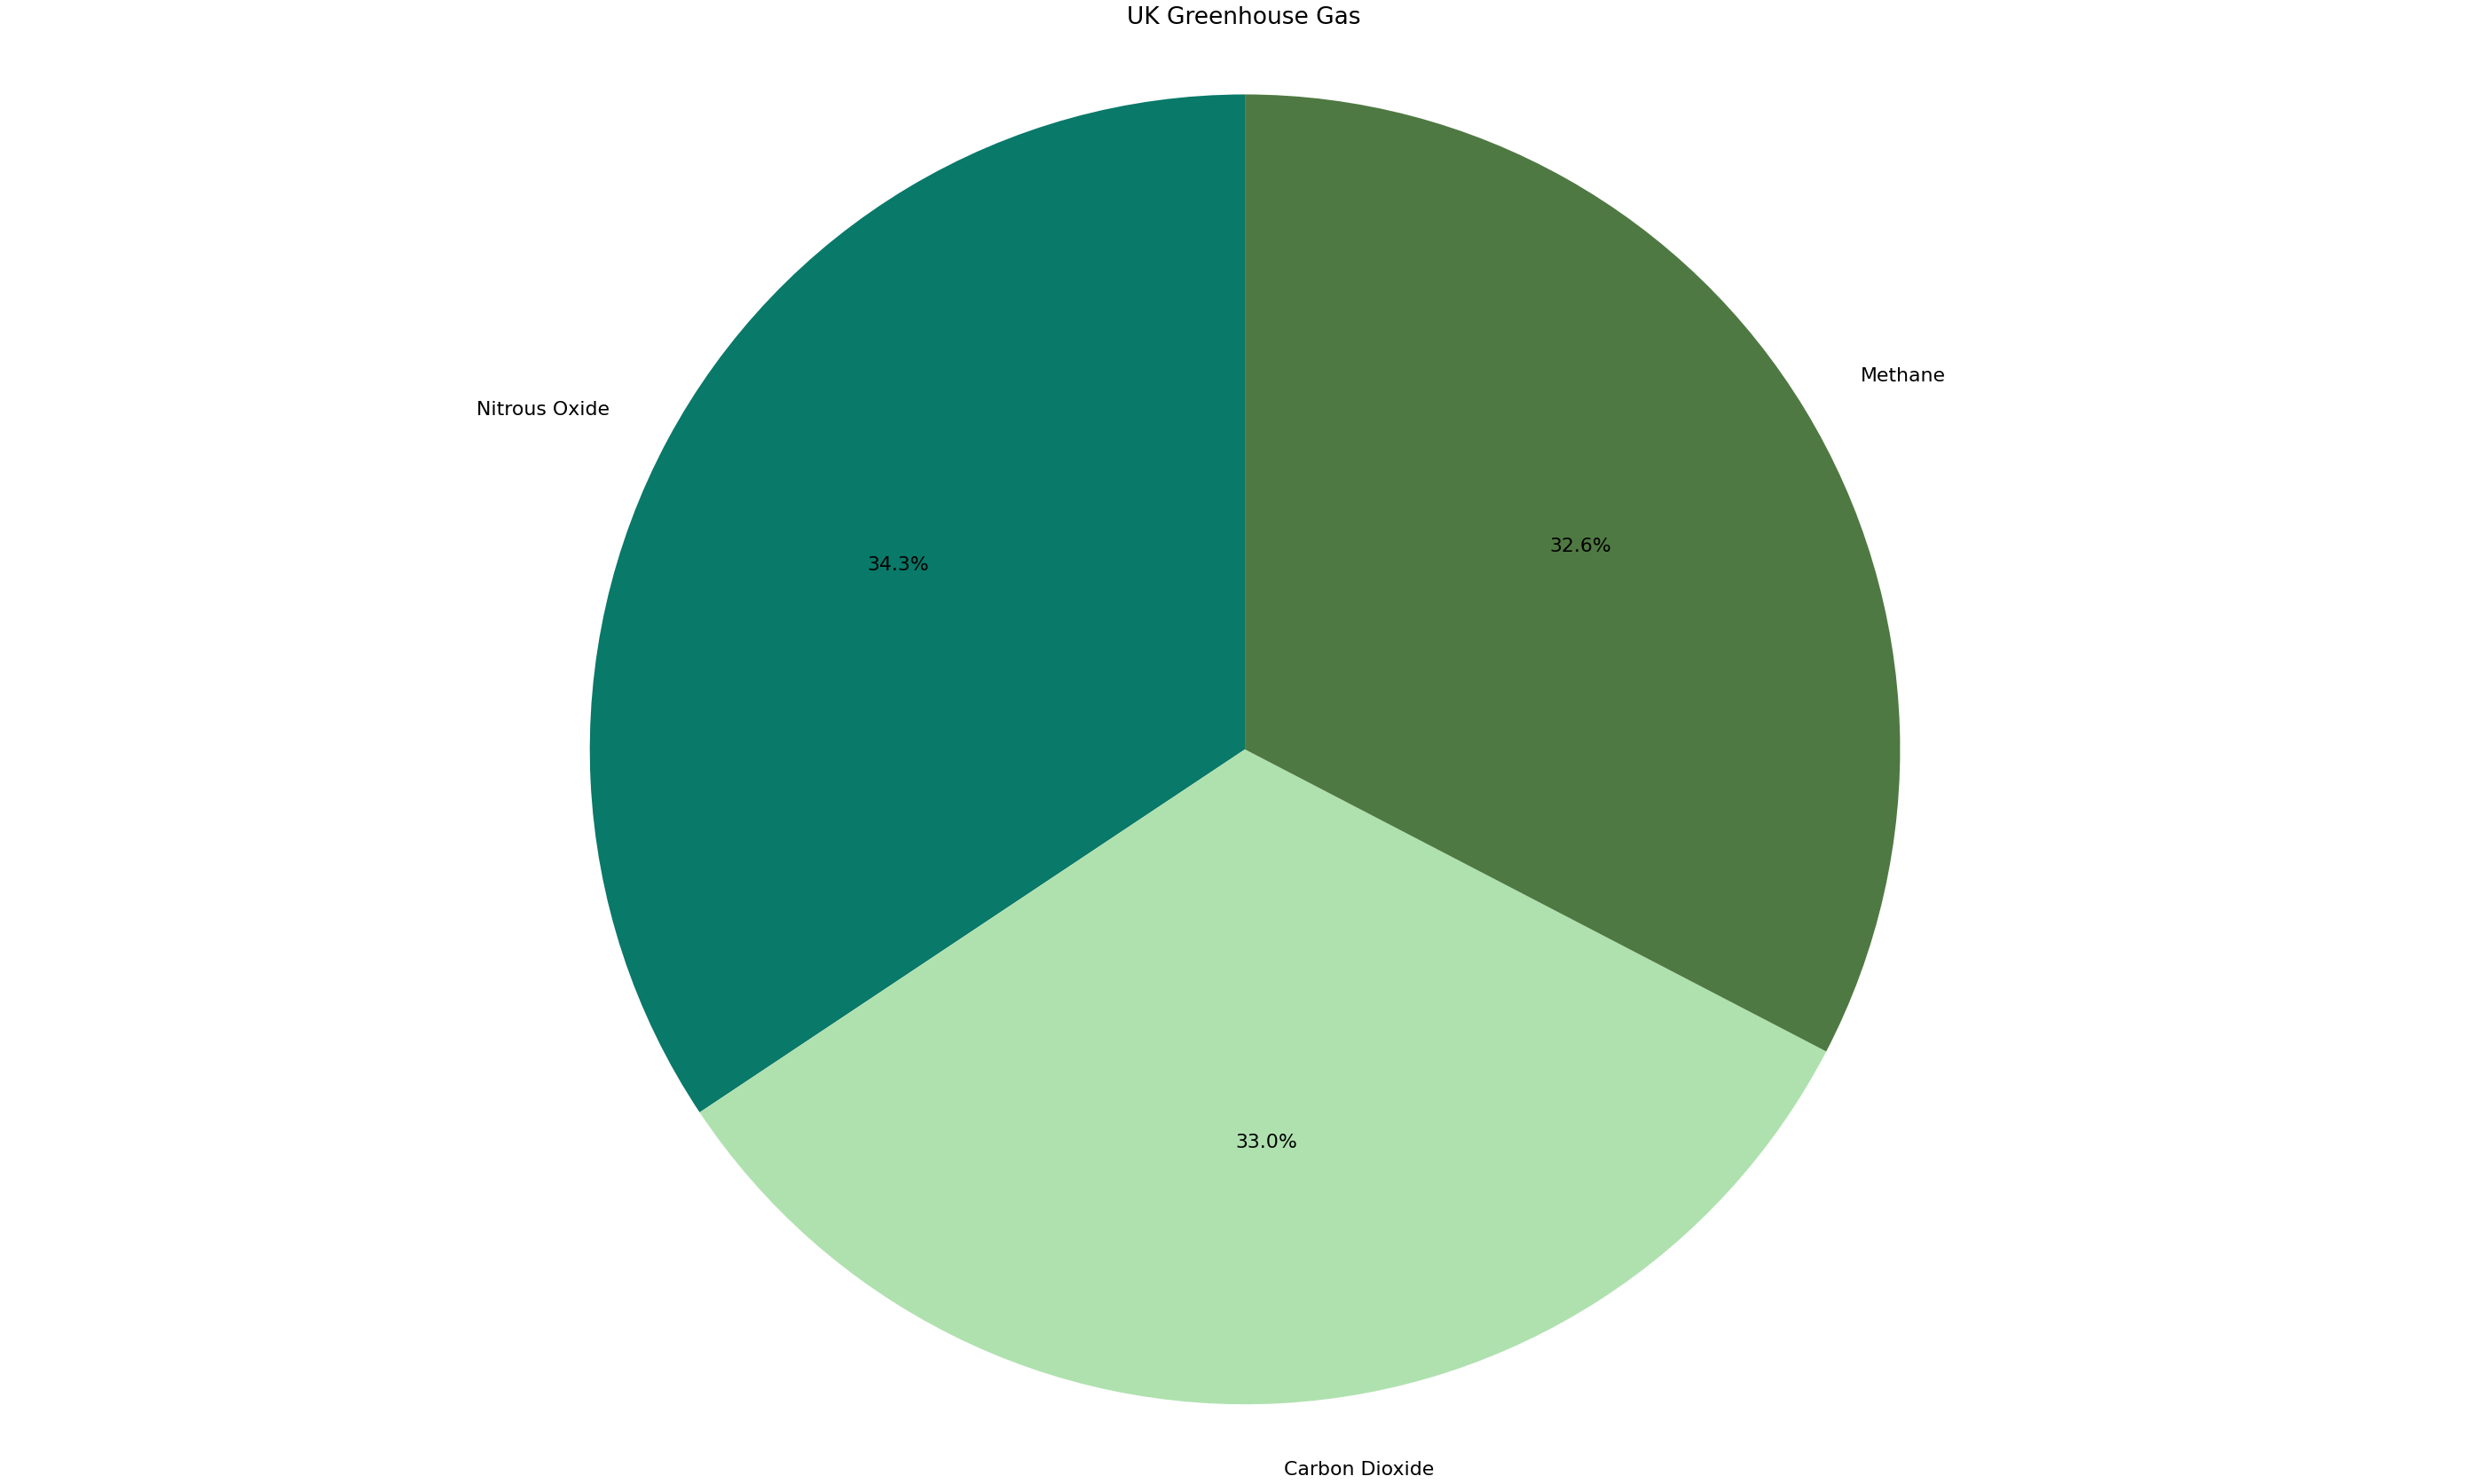

<Figure size 36x36 with 0 Axes>

In [35]:
# Pie chart
perc = [34.35, 33.02, 32.63]
gases = ['Nitrous Oxide', 'Carbon Dioxide', 'Methane']
font = 20

#customization 
colours = ['#097969','#AFE1AF','#4F7942']
fig1, ax1 = plt.subplots()
ax1.pie(perc, colors = colours, labels=gases,autopct='%1.1f%%', startangle=90)
fig = plt.gcf()


ax1.axis('equal') 
plt.title("Overview of UK Greenhouse Gas Emissions (2005 - 2020") 
plt.figure(figsize=(0.5,0.5))
plt.tight_layout()
plt.show()


<AxesSubplot:>

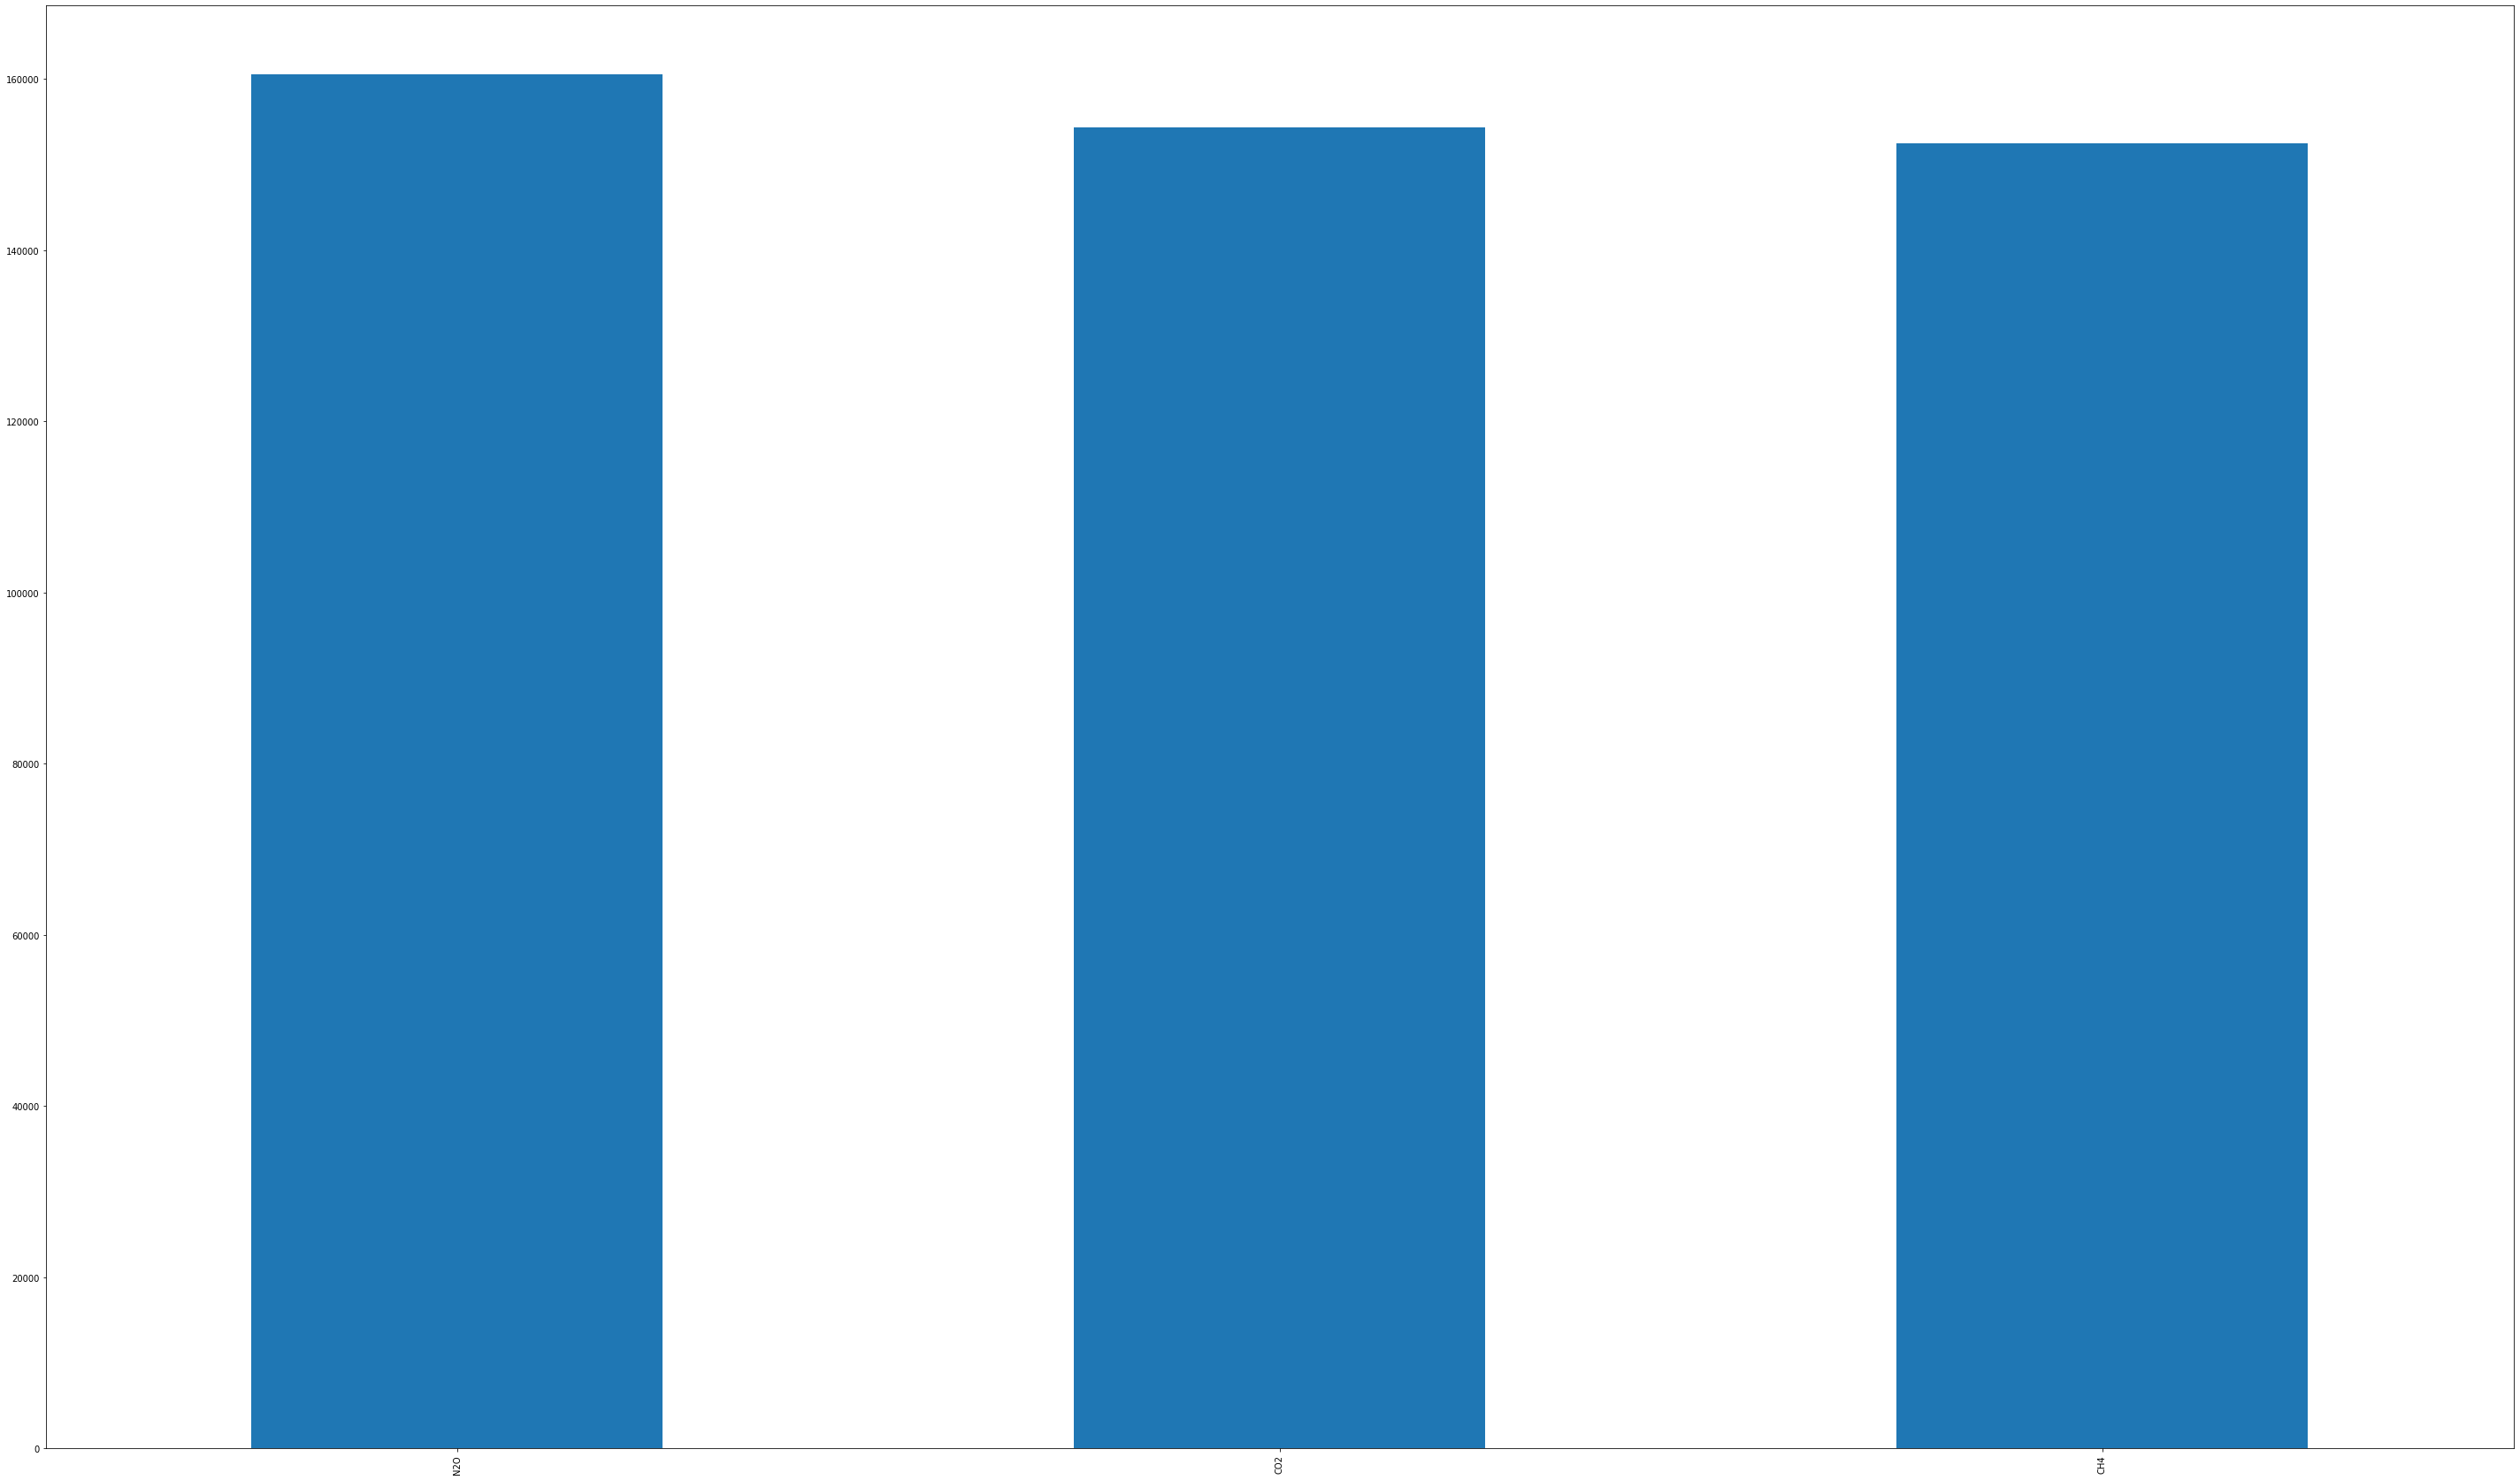

In [12]:
gd["Greenhouse gas"].value_counts().plot(kind="bar")

_____________________________________________________

DATA TRENDS AND EMISSIONS:

In [36]:
#Finding Max, min, median, mode, mean values

maxClm = gd['CO2 emissions within the scope of influence of LAs (kt CO2e)'].max()
minClm = gd['CO2 emissions within the scope of influence of LAs (kt CO2e)'].min()
medClm = gd['CO2 emissions within the scope of influence of LAs (kt CO2e)'].median()
modeclm = gd['CO2 emissions within the scope of influence of LAs (kt CO2e)'].mode()
meanclm = gd['CO2 emissions within the scope of influence of LAs (kt CO2e)'].mean()
#printing values 

print('\n',"Maximum Value in Column =", maxClm,'\n',
"Minimum Value in Column =", minClm,'\n',
"Median Value in Column =",medClm, '\n',
"Mean Value in Column =",meanclm, '\n',
"Mode Value in Column =",modeclm)


 Maximum Value in Column = 4026.945363 
 Minimum Value in Column = 0.0 
 Median Value in Column = 0.0 
 Mean Value in Column = 12.618935238207818 
 Mode Value in Column = 0    0.0
Name: CO2 emissions within the scope of influence of LAs (kt CO2e), dtype: float64


In [6]:
gd.describe(include='all')

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2e),Mid-year Population (thousands),Area (km2)
count,467443,467088,467443,467088,467088,467443,467443,467443.000000,467443,467443,467443,467443.000000,467443.000000,467443.000000,467443.000000
unique,5,4,13,12,151,377,376,NaN,8,32,3,NaN,NaN,NaN,NaN
top,England,E92000001,South East,E12000008,Scotland,Doncaster,E08000017,NaN,Transport,Industry Electricity,N2O,NaN,NaN,NaN,NaN
freq,385869,385869,79123,79123,40027,1340,1340,NaN,81144,18096,160564,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.548197,NaN,NaN,NaN,16.029964,12.618935,171.972621,671.648052
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.634511,NaN,NaN,NaN,94.186416,49.969305,116.024952,1654.220436
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.000000,NaN,NaN,NaN,-2920.785256,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,0.030717,0.000000,99.383000,97.958400
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,0.472936,0.000000,136.126000,279.042600
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,3.742259,0.000000,212.137000,680.083400


In [59]:
gd.columns

Index(['Country', 'Country Code', 'Region', 'Region Code',
       'Second Tier Authority', 'Local Authority', 'Local Authority Code',
       'Calendar Year', 'LA GHG Sector', 'LA GHG Sub-sector', 'Greenhouse gas',
       'Territorial emissions (kt CO2e)',
       'CO2 emissions within the scope of influence of LAs (kt CO2e)',
       'Mid-year Population (thousands)', 'Area (km2)'],
      dtype='object')

In [6]:
gd['Territorial emissions (kt CO2e)'].describe()

count    467443.000000
mean         16.029964
std          94.186416
min       -2920.785256
25%           0.030717
50%           0.472936
75%           3.742259
max        9497.777472
Name: Territorial emissions (kt CO2e), dtype: float64

MAPS


In [6]:
zipfile='Regions_(December_2017)_Boundaries.shp'
custom=gpd.read_file(zipfile)


In [11]:
custom.head()

,geometry
0,"MULTIPOLYGON (((398253.902 652833.898, 398317...."
1,"MULTIPOLYGON (((357012.898 586734.198, 356931...."
2,"MULTIPOLYGON (((478203.003 518916.601, 478373...."
3,"MULTIPOLYGON (((512490.996 414654.696, 512679...."
4,"POLYGON ((403387.797 368314.900, 403515.999 36..."


<AxesSubplot:>

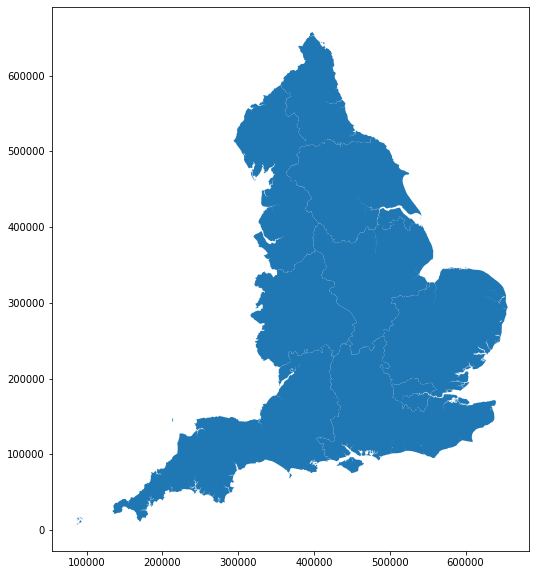

In [57]:
custom.plot(figsize=(20,10))


In [8]:
sf = gpd.read_file('Regions_(December_2017)_Boundaries.geojson')
sf.head()


,objectid,rgn17cd,rgn17nm,bng_e,bng_n,long,lat,st_areashape,st_lengthshape,geometry
0,1,E12000001,North East,417313,600358,-1.72890,55.297031,8.592522e+09,9.831597e+05,"MULTIPOLYGON (((-2.02941 55.76884, -2.02524 55..."
1,2,E12000002,North West,350015,506280,-2.77237,54.449451,1.416376e+10,2.004965e+06,"MULTIPOLYGON (((-2.67644 55.17304, -2.67427 55..."
2,3,E12000003,Yorkshire and The Humber,446903,448736,-1.28712,53.932640,1.540936e+10,1.359099e+06,"MULTIPOLYGON (((-0.79223 54.55947, -0.79383 54..."
3,4,E12000004,East Midlands,477660,322635,-0.84967,52.795719,1.564318e+10,1.298010e+06,"MULTIPOLYGON (((-0.30093 53.61639, -0.30442 53..."
4,5,E12000005,West Midlands,386294,295477,-2.20358,52.556969,1.300373e+10,9.211872e+05,"POLYGON ((-1.95073 53.21190, -1.95671 53.21375..."


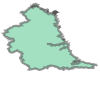

In [11]:
sf.loc[0].geometry

In [12]:
sf['value'] = np.random.randint(1, 10, sf.shape[0])


In [13]:
deps = gd.Polygons(sf, vdims=['rgn17nm','value'])

AttributeError: 'DataFrame' object has no attribute 'Polygons'

----


Calendar Year

In [30]:
#Number of values for each year
co2et = gd[gd['Calendar Year']<=2020]
co2et.groupby('Calendar Year')['CO2 emissions within the scope of influence of LAs (kt CO2e)'].count()

Calendar Year
2005    29111
2006    29157
2007    29130
2008    29134
2009    28859
2010    28857
2011    28852
2012    28857
2013    28877
2014    28891
2015    28900
2016    28908
2017    28909
2018    30419
2019    30407
2020    30175
Name: CO2 emissions within the scope of influence of LAs (kt CO2e), dtype: int64

In [31]:
gd.columns

Index(['Country', 'Country Code', 'Region', 'Region Code',
       'Second Tier Authority', 'Local Authority', 'Local Authority Code',
       'Calendar Year', 'LA GHG Sector', 'LA GHG Sub-sector', 'Greenhouse gas',
       'Territorial emissions (kt CO2e)',
       'CO2 emissions within the scope of influence of LAs (kt CO2e)',
       'Mid-year Population (thousands)', 'Area (km2)'],
      dtype='object')

In [23]:
#INCREASE/DECREASE OF C02E
# Specifying all countries == world, and e_type == all
cd0 = gd[gd['Country']=='all'][gd['LA GHG Sector']=='all'][['Calendar Year', 'Territorial emissions (kt CO2e)']].reset_index(drop=True)

# For yearlly percentage change
temp_cd0 = cd0
temp_cd0['pct_change'] = temp_cd0['Territorial emissions (kt CO2e)'].pct_change() * 100

# For overall percentage change
temp_cd02 = cd0

keep = [2005, 2020]
for year in temp_cd02['Calendar Year'].unique():
    if year not in keep:
        temp_cd02 = temp_cd02[temp_cd02['Calendar Year']!=year]
        
temp_cd02['pct_change'] = temp_cd02['Territorial emissions (kt CO2e)'].pct_change() * 100

# Plotting figure
fig = px.area(temp_cd0, x='Calendar Year', y='pct_change', title='CO2 Emission percentage rate increase/decrease each year')
fig.show()

print(f'The average yearly percentage change is {round(temp_cd0["pct_change"].mean(), 2)}%,\n and the overall percentage change from 1988 to 2019 is {round(temp_cd02["pct_change"].sum(), 2)}%')

C:\Users\Nadeem\AppData\Local\Temp\ipykernel_22264\1579366090.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



The average yearly percentage change is nan%,
 and the overall percentage change from 1988 to 2019 is 0.0%


In [40]:

cd1 = gd[gd['Country']!='all'][gd['LA GHG Sector']=='all']

list = []

for country in cd1['Country'].unique():
    total = cd1[cd1['Country']==country]['CO2 emissions within the scope of influence of LAs (kt CO2e)'].sum(axis=0)
    list.extend([[country, total]])

    
# Temporary dataset of all the Countries and there respective total CO2 Emission over the time period
temp_cd = pd.DataFrame(list, columns=['Country', 'Total_CO2']).sort_values(by='Total_CO2',ascending=False)

# Plotting the top 20 Emiters
fig = px.bar(temp_cd.head(20), x='Country', y='Total_CO2', title='Top 20 CO2 Emitters (MMtonnes CO2)')
fig.show()

In [33]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467443 entries, 0 to 467442
Data columns (total 15 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Country                                                       467443 non-null  object 
 1   Country Code                                                  467088 non-null  object 
 2   Region                                                        467443 non-null  object 
 3   Region Code                                                   467088 non-null  object 
 4   Second Tier Authority                                         467088 non-null  object 
 5   Local Authority                                               467443 non-null  object 
 6   Local Authority Code                                          467443 non-null  object 
 7   Calendar Year                                           

In [35]:
gd.describe(include='all')

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2e),Mid-year Population (thousands),Area (km2)
count,467443,467088,467443,467088,467088,467443,467443,467443.000000,467443,467443,467443,467443.000000,467443.000000,467443.000000,467443.000000
unique,5,4,13,12,151,377,376,NaN,8,32,3,NaN,NaN,NaN,NaN
top,England,E92000001,South East,E12000008,Scotland,Doncaster,E08000017,NaN,Transport,Industry Electricity,N2O,NaN,NaN,NaN,NaN
freq,385869,385869,79123,79123,40027,1340,1340,NaN,81144,18096,160564,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.548197,NaN,NaN,NaN,16.029964,12.618935,171.972621,671.648052
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.634511,NaN,NaN,NaN,94.186416,49.969305,116.024952,1654.220436
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.000000,NaN,NaN,NaN,-2920.785256,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,0.030717,0.000000,99.383000,97.958400
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,0.472936,0.000000,136.126000,279.042600
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,3.742259,0.000000,212.137000,680.083400


In [36]:
for var in gd:
    print(f'{var}: {gd[var].nunique()}')

Country: 5
Country Code: 4
Region: 13
Region Code: 12
Second Tier Authority: 151
Local Authority: 377
Local Authority Code: 376
Calendar Year: 16
LA GHG Sector: 8
LA GHG Sub-sector: 32
Greenhouse gas: 3
Territorial emissions (kt CO2e): 460115
CO2 emissions within the scope of influence of LAs (kt CO2e): 107962
Mid-year Population (thousands): 5868
Area (km2): 375


In [37]:
print('Number of Duplicates: {}'.format(len(gd[gd.duplicated()])))

Number of Duplicates: 0


In [38]:
for var in gd:
    print(f'{var}: {gd[var].isnull().sum()}')

Country: 0
Country Code: 355
Region: 0
Region Code: 355
Second Tier Authority: 355
Local Authority: 0
Local Authority Code: 0
Calendar Year: 0
LA GHG Sector: 0
LA GHG Sub-sector: 0
Greenhouse gas: 0
Territorial emissions (kt CO2e): 0
CO2 emissions within the scope of influence of LAs (kt CO2e): 0
Mid-year Population (thousands): 0
Area (km2): 0
